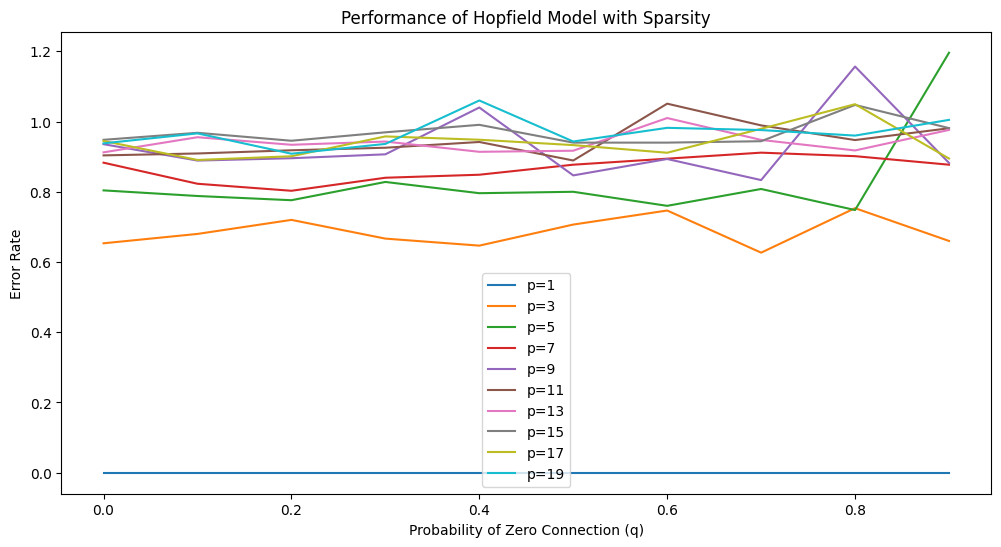

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_patterns(N, p):
    return np.random.choice([-1, 1], size=(p, N))

def construct_weight_matrix(patterns, q):
    N = patterns.shape[1]
    p = patterns.shape[0]
    J = np.zeros((N, N))
    for alpha in range(p):
        J += np.outer(patterns[alpha], patterns[alpha])
    J /= p
    mask = np.random.rand(N, N) > q
    J *= mask
    np.fill_diagonal(J, 0)
    return J

def update_state(state, J):
    return np.sign(J @ state)

def run_hopfield(N, p, q, steps=10):
    patterns = generate_patterns(N, p)
    J = construct_weight_matrix(patterns, q)
    initial_state = patterns[0]
    state = initial_state.copy()
    for _ in range(steps):
        state = update_state(state, J)
    return patterns, initial_state, state

def calculate_overlap(patterns, retrieved_state):
    overlaps = []
    for pattern in patterns:
        overlaps.append(np.dot(pattern, retrieved_state) / len(pattern))
    return np.mean(overlaps)

def evaluate_performance(N, p_values, q_values):
    error_rates = np.zeros((len(p_values), len(q_values)))
    for i, p in enumerate(p_values):
        for j, q in enumerate(q_values):
            _, initial_state, final_state = run_hopfield(N, p, q)
            overlap = calculate_overlap(_, final_state)
            error_rates[i, j] = 1 - overlap
    return error_rates

N = 100
p_values = np.arange(1, 21, 2)
q_values = np.linspace(0, 0.9, 10)

error_rates = evaluate_performance(N, p_values, q_values)

plt.figure(figsize=(12, 6))
for i, p in enumerate(p_values):
    plt.plot(q_values, error_rates[i], label=f'p={p}')
plt.xlabel('Probability of Zero Connection (q)')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Performance of Hopfield Model with Sparsity')
plt.show()


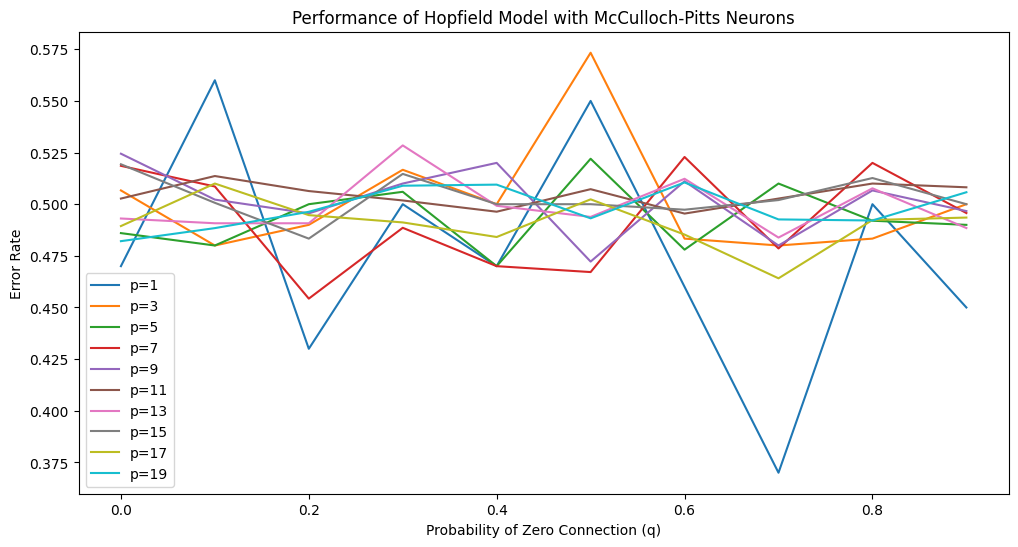

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_patterns(N, p):
    return np.random.choice([0, 1], size=(p, N))

def construct_weight_matrix(patterns, q):
    N = patterns.shape[1]
    p = patterns.shape[0]
    J = np.zeros((N, N))
    for alpha in range(p):
        J += np.outer(patterns[alpha], patterns[alpha])
    J /= p
    mask = np.random.rand(N, N) > q
    J *= mask
    np.fill_diagonal(J, 0)
    return J

def update_state(state, W):
    return np.where(W @ state > 0, 1, 0)

def run_hopfield(N, p, q, steps=10):
    patterns = generate_patterns(N, p)
    W = construct_weight_matrix(patterns, q)
    initial_state = patterns[0]
    state = initial_state.copy()
    for _ in range(steps):
        state = update_state(state, W)
    return patterns, initial_state, state

def calculate_overlap(patterns, retrieved_state):
    overlaps = []
    for pattern in patterns:
        overlaps.append(np.dot(pattern, retrieved_state) / len(pattern))
    return np.mean(overlaps)

def evaluate_performance(N, p_values, q_values):
    error_rates = np.zeros((len(p_values), len(q_values)))
    for i, p in enumerate(p_values):
        for j, q in enumerate(q_values):
            _, initial_state, final_state = run_hopfield(N, p, q)
            overlap = calculate_overlap(_, final_state)
            error_rates[i, j] = 1 - overlap
    return error_rates

N = 100
p_values = np.arange(1, 21, 2)
q_values = np.linspace(0, 0.9, 10)

error_rates = evaluate_performance(N, p_values, q_values)

plt.figure(figsize=(12, 6))
for i, p in enumerate(p_values):
    plt.plot(q_values, error_rates[i], label=f'p={p}')
plt.xlabel('Probability of Zero Connection (q)')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Performance of Hopfield Model with McCulloch-Pitts Neurons')
plt.show()
